# Chapter 1_2 方差分析
----
author: W.Y.  
first_edition: 2020/1/1  
last_edition: 2020/1/15  
description: 王汉生老师书的第二章，方差分析的python极简实现  

----

In [1]:
# 导入模块
import pandas as pd  
import seaborn as sns  # 画图
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import statsmodels.formula.api as smf  
import statsmodels.api as sma
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # 多重比较
import lmdiag  

In [2]:
# 导入数据之导入csv文件 

data_real = pd.read_csv('E:\Data Mining\SimplePython\Chapter 1 从R到Python\CH 1_2 方差分析\CH 1_2 data real.csv', encoding='gbk')  # NOTE
data_new = pd.read_csv('E:\Data Mining\SimplePython\Chapter 1 从R到Python\CH 1_2 方差分析\CH 1_2 data new.csv', encoding='gbk')

**NOTE**

>因为文件中出现了中文，所以需要修改编码格式，用`encoding='gbk'`

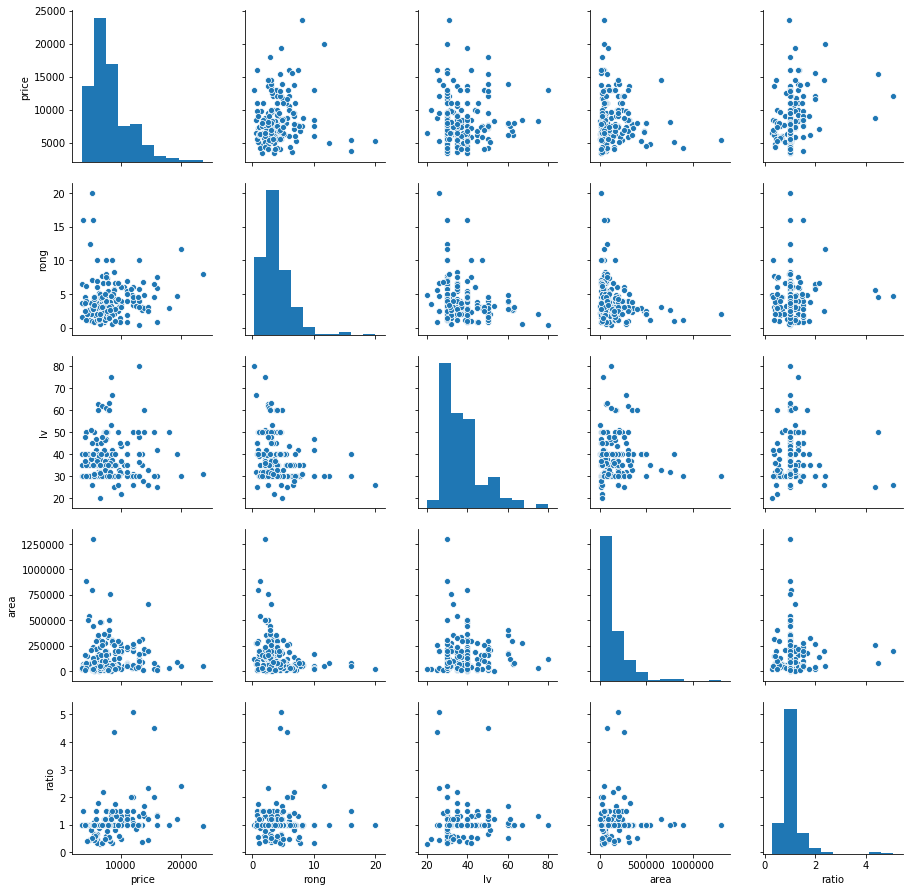

In [5]:
sns.pairplot(data_real)   # 结果和R不同，因为前几个变量是字符串，所以要转为数值型

In [10]:
data_real['dis_0'] = pd.Categorical(data_real['dis']).codes
data_real['ring_0'] = pd.Categorical(data_real['ring']).codes
data_real['wuye_0'] = pd.Categorical(data_real['wuye']).codes
data_real['fitment_0'] = pd.Categorical(data_real['fitment']).codes
data_real['contype_0'] = pd.Categorical(data_real['contype']).codes

In [17]:
data_plot = pd.DataFrame(data_real, columns=['dis_0', 'ring_0', 'wuye_0', 'fitment_0',
                                             'contype_0', 'price'])

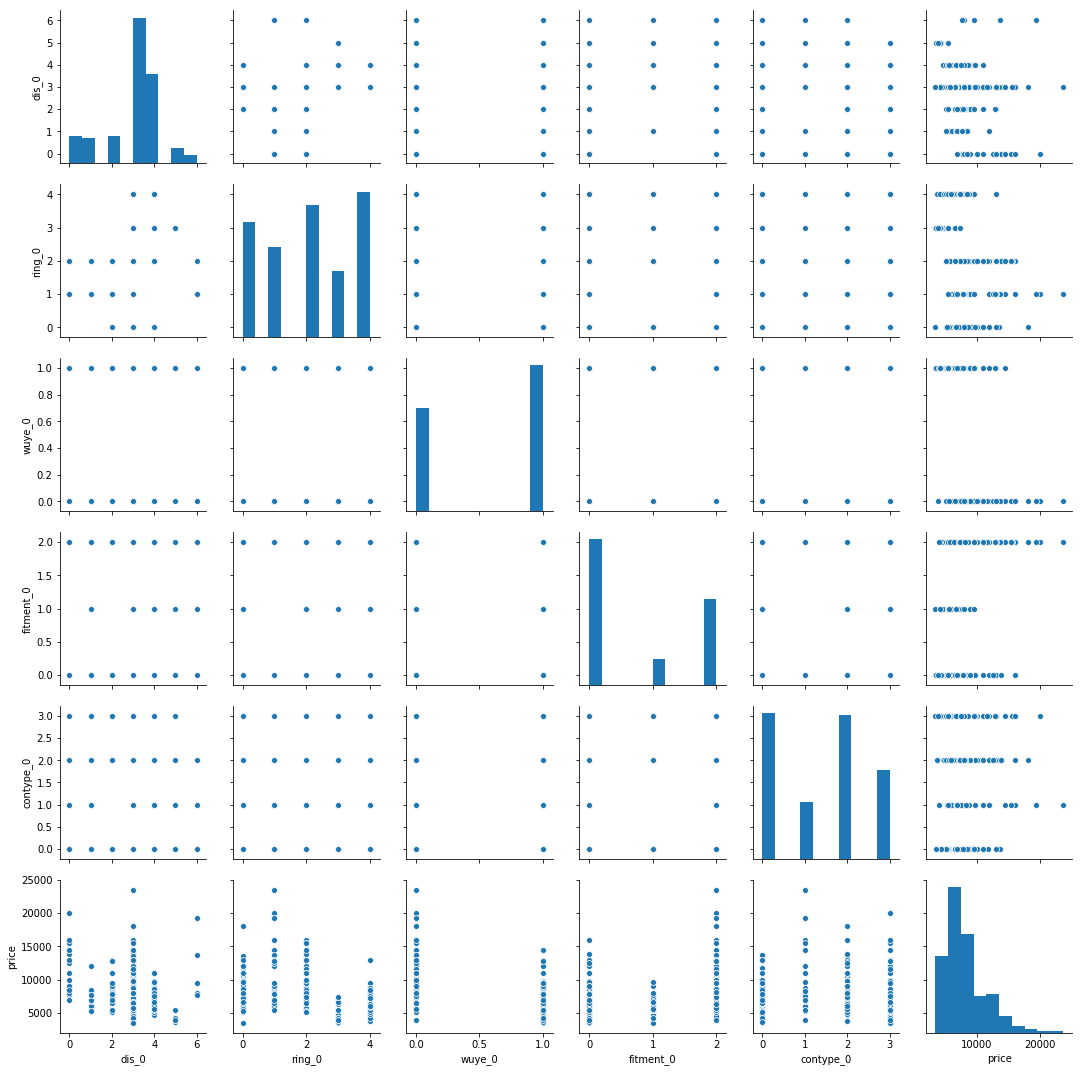

In [18]:
sns.pairplot(data_plot)  

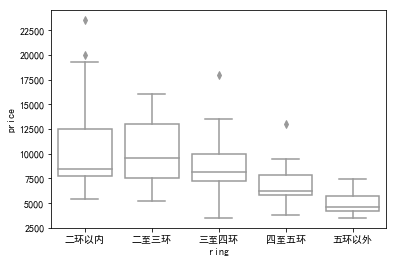

In [19]:
# 描述性分析 箱图
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 为了画图能够显示中文，否则中文会变成乱码。
plt.rcParams['axes.unicode_minus']=False  # 正常显示负号

sns.boxplot(x='ring',y='price',data=data_real, color='white',
           order=['二环以内', '二至三环', '三至四环', '四至五环', '五环以外'])  # order设置顺序，可以试试不加order的效果

In [20]:
data_real['log_price'] = np.log(data_real['price'])  # 常规操作，取哈对数

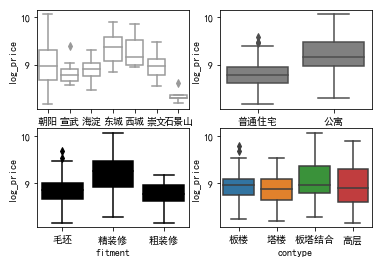

In [21]:
# 描述性分析 箱图 （多图一起画）
sns.boxplot(x=data_real['dis'],y=data_real['log_price'], color='white', 
            ax=plt.subplot(2,2,1))  # 设置2×2的画布，选定第1副子图，即第一行第一个。下同
sns.boxplot(x=data_real['wuye'],y=data_real['log_price'], color='grey', ax=plt.subplot(2,2,2))
sns.boxplot(x=data_real['fitment'],y=data_real['log_price'], color='black', ax=plt.subplot(2,2,3))
sns.boxplot(x=data_real['contype'],y=data_real['log_price'], ax=plt.subplot(2,2,4))

In [27]:
# 描述性分析（频数分布）
data_real.iloc[:, 0:5].apply(pd.Series.value_counts)

,dis,ring,wuye,fitment,contype
三至四环,NaN,42.0,NaN,NaN,NaN
东城,16.0,NaN,NaN,NaN,NaN
二环以内,NaN,33.0,NaN,NaN,NaN
二至三环,NaN,48.0,NaN,NaN,NaN
五环以外,NaN,24.0,NaN,NaN,NaN
公寓,NaN,NaN,83.0,NaN,NaN
四至五环,NaN,53.0,NaN,NaN,NaN
塔楼,NaN,NaN,NaN,NaN,67.0
宣武,15.0,NaN,NaN,NaN,NaN
崇文,16.0,NaN,NaN,NaN,NaN


In [33]:
print(data_real.ring.value_counts())
print(data_real.fitment.value_counts())
print(data_real['wuye'].value_counts())
print(data_real['contype'].value_counts())

四至五环    53
二至三环    48
三至四环    42
二环以内    33
五环以外    24
Name: ring, dtype: int64
毛坯     113
精装修     67
粗装修     20
Name: fitment, dtype: int64
普通住宅    117
公寓       83
Name: wuye, dtype: int64
塔楼      67
板楼      66
高层      41
板塔结合    26
Name: contype, dtype: int64


In [34]:
# 单因素方差分析

anova_1 = smf.ols('log_price ~ C(ring)', data=data_real).fit()
print(sma.stats.anova_lm(anova_1, typ=3))   # typ=3就是R中的type='III'

                sum_sq     df             F         PR(>F)
Intercept  3420.771587    1.0  39352.634271  6.554708e-227
C(ring)       9.965243    4.0     28.660096   9.752385e-19
Residual     16.950592  195.0           NaN            NaN


note: 公式中的`C(ring)`类似R中的`as.factor(ring)`。本案例中是字符串型的数据，所以加不加无所谓，
如果是数值型的分类数据，比如编码为1、2、3等，则需要加上`C()`，否则会视为连续变量。

In [35]:
# 查看具体每个水平的情况
print(anova_1.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     28.66
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           9.75e-19
Time:                        11:47:39   Log-Likelihood:                -36.986
No. Observations:                 200   AIC:                             83.97
Df Residuals:                     195   BIC:                             100.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.0248      0.045    1

In [37]:
# 多重比较
compare_1 = pairwise_tukeyhsd(data_real['log_price'], data_real['ring'])
print(compare_1.summary())   # reject = True就是拒绝原假设，说明两组差异显著。

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 三至四环   二环以内   0.1263  -0.0625  0.3152 False 
 三至四环   二至三环   0.1315   -0.04   0.3031 False 
 三至四环   五环以外  -0.5192  -0.7269 -0.3114  True 
 三至四环   四至五环  -0.2493   -0.417 -0.0815  True 
 二环以内   二至三环   0.0052  -0.1784  0.1888 False 
 二环以内   五环以外  -0.6455  -0.8633 -0.4277  True 
 二环以内   四至五环  -0.3756  -0.5556 -0.1956  True 
 二至三环   五环以外  -0.6507  -0.8537 -0.4477  True 
 二至三环   四至五环  -0.3808  -0.5426  -0.219  True 
 五环以外   四至五环   0.2699   0.0702  0.4696  True 
---------------------------------------------


In [56]:
# 多因素方差分析 （书里太啰嗦啦，直接多因素，就包括了单因素、双因素和交互作用啦）

anova_2 = smf.ols('log_price ~ C(dis)+C(ring) + C(wuye) + C(fitment) +'
                  'C(contype)', data=data_real).fit()

# 没错！看到了熟悉了*号，和R一样，也是用*来分析交互作用的

print(sma.stats.anova_lm(anova_2, typ=3))

                sum_sq     df             F         PR(>F)
Intercept   466.584549    1.0  10354.952743  5.081149e-163
C(dis)        2.224648    6.0      8.228635   6.819626e-08
C(ring)       3.972187    4.0     22.038773   7.288855e-15
C(wuye)       1.121792    1.0     24.896031   1.401219e-06
C(fitment)    1.292741    2.0     14.344964   1.631950e-06
C(contype)    0.169358    3.0      1.252861   2.920588e-01
Residual      8.245810  183.0           NaN            NaN


In [54]:
print(anova_2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     19.08
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           5.03e-37
Time:                        12:07:28   Log-Likelihood:                 45.318
No. Observations:                 200   AIC:                            -40.64
Df Residuals:                     175   BIC:                             41.82
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

<module 'matplotlib.pyplot' from 'D:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

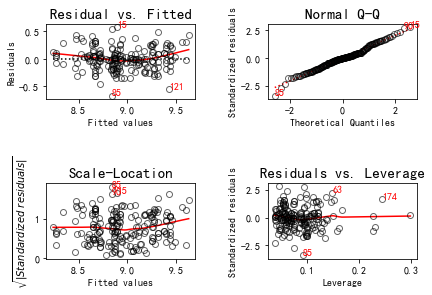

In [57]:
# 模型诊断
lmdiag.plot(anova_2)

# 是不是报错了？哈哈哈~如果把交互项去掉，就不会报错了，但是加了就会报错。
# 具体啥原因我也解释不清楚。没办法，不走心的教程。各位自己解决吧~~


In [62]:
# 预测

predict = anova_2.predict(data_new)

In [64]:
data_new['predict'] = np.exp(predict)

In [65]:
print(data_new)

  dis  ring  wuye fitment contype  rong  lv    area  ratio      predict
0  朝阳  三至四环  普通住宅      毛坯      板楼   2.2  55  450000   1.25  7597.345201
1  海淀  三至四环  普通住宅     精装修    板塔结合   1.8  25   70000   0.80  9161.112961
2  海淀  四至五环  普通住宅     粗装修      高层   1.5  35  130000   1.10  5482.143205
3  崇文  二环以内    公寓      毛坯      塔楼   1.9  45  180000   1.00  8503.994991
